## About Dataset


### Context:
<p>
The dataset is the Cleveland Heart Disease dataset taken from the UCI repository. The dataset consists of 303 individuals’ data. There are 14 columns in the dataset(which have been extracted from a larger set of 75). No missing values. The classification task is to predict whether an individual is suffering from heart disease or not. (0: absence, 1: presence)

original data: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
</p>

In [50]:
# IMPORTING THE BASIC NECESSARY MODULES FOR THE PROJECT

import pandas as pd  # to load and manipulate the data
import numpy as np   # to calculate the mathematical operations 
import matplotlib.pyplot as plt    # to draw graphs

In [4]:
# LOADING THE DATASET USING PANDAS

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                header=None)


In [6]:
# PRINTING THE FIRST 5 ROWS
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Instead of column names we are provided with column numbers. As column names makes it easier to format the data, we can replace the column numbers with the required column names

- **age**
- **sex**
- **cp** (chest pain)
- **restbp** (resting blood pressure in mm Hg)
- **chol** (cholesterol in mg/dl)
- **fbs** (fasting blood sugar)
- **restecg** (resting electrocardiographic results)
- **thalach** (maximum heart rate achieved)
- **exang** (exercise induced angina)
- **oldpeak** (ST depression)
- **slope** (the slope of peak exercise)
- **ca** (number of major vessels from 0 -3 colured from fluroscopy)
- **thal** (short term of thalium heart scan)
 - **hd** (diagnosis of heart disease)

In [8]:
# CHANGING COLUMN NUMBERS TO COLUMN NAMES

df.columns = ['age', 'sex', 'cp', 'restbp', 
             'chol', 'fbs', 'restecg', 'thalach', 'exang',
             'oldpeak', 'slope', 'ca', 'thal', 'hd']

In [9]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
# IDENTIFYING THE MISSING DATA

<p>
There are two main ways to deal with missing data:

1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all of the other values that we
collected. How a big of a waste this is depends on how important this missing value is for classification. For example, if we are missing a value for
age, and age is not useful for classifying if people have heart disease or not, then it would be a shame to throw out all of someone's data just
because we do not have their age.
2. We can impute the values that are missing. In this context impute is just a fancy way of saying "we can make an educated guess about about what
the value should be". Continuing our example where we are missing a value for age, instead of throwing out the entire row of data, we can fill the
missing value with the average age or the median age, or use some other, more sophisticated approach, to guess at an appropriate value.
</p>

In [12]:
# CHECK FOR DATA TYPE FOR EACH COLUMNS

df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [13]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [14]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [15]:
# '?' may refer to the missing data

In [17]:
# DEALING WITH MISSING DATA

len(df.loc[(df['ca'] == "?") | (df['thal'] == "?")])

6

In [19]:
# ROWS HAVING MISSING DATA

df.loc[(df['ca'] == "?") | (df['thal'] == "?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [20]:
len(df)  # TOTAL ROWS IN A DATASET

303

In [21]:
# As only 6 rows has missing data, the rows can be deleted from the dataset

In [22]:
df_no_missing = df.loc[(df['ca'] != "?") & (df['thal'] != "?")]

In [23]:
df_no_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [24]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [25]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [26]:
# FORMATTING THE DATA: SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [32]:
X = df_no_missing.drop("hd", axis =1).copy()  
y = df_no_missing["hd"]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [36]:
# FORMATTING THE DATA: ONE - HOT ENCODING

X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [37]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [39]:
pd.get_dummies(X, columns=['cp'], dtype=int).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [40]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg',
                                      'slope', 'thal'], 
                          dtype=int)

In [41]:
X_encoded.head()


,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [42]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [43]:
y_not_zero_index = y > 0 # Getting index for each non-zero value in y
y[y_not_zero_index] = 1 # Setting non-zero values to one

y.unique()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6284\2864068064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_index] = 1 # Setting non-zero values to one


array([0, 1], dtype=int64)

## BUILDING THE CLASSIFICATION TREE

In [44]:
# SPLITING THE DATA FOR TRAINING AND TESTING SET

from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

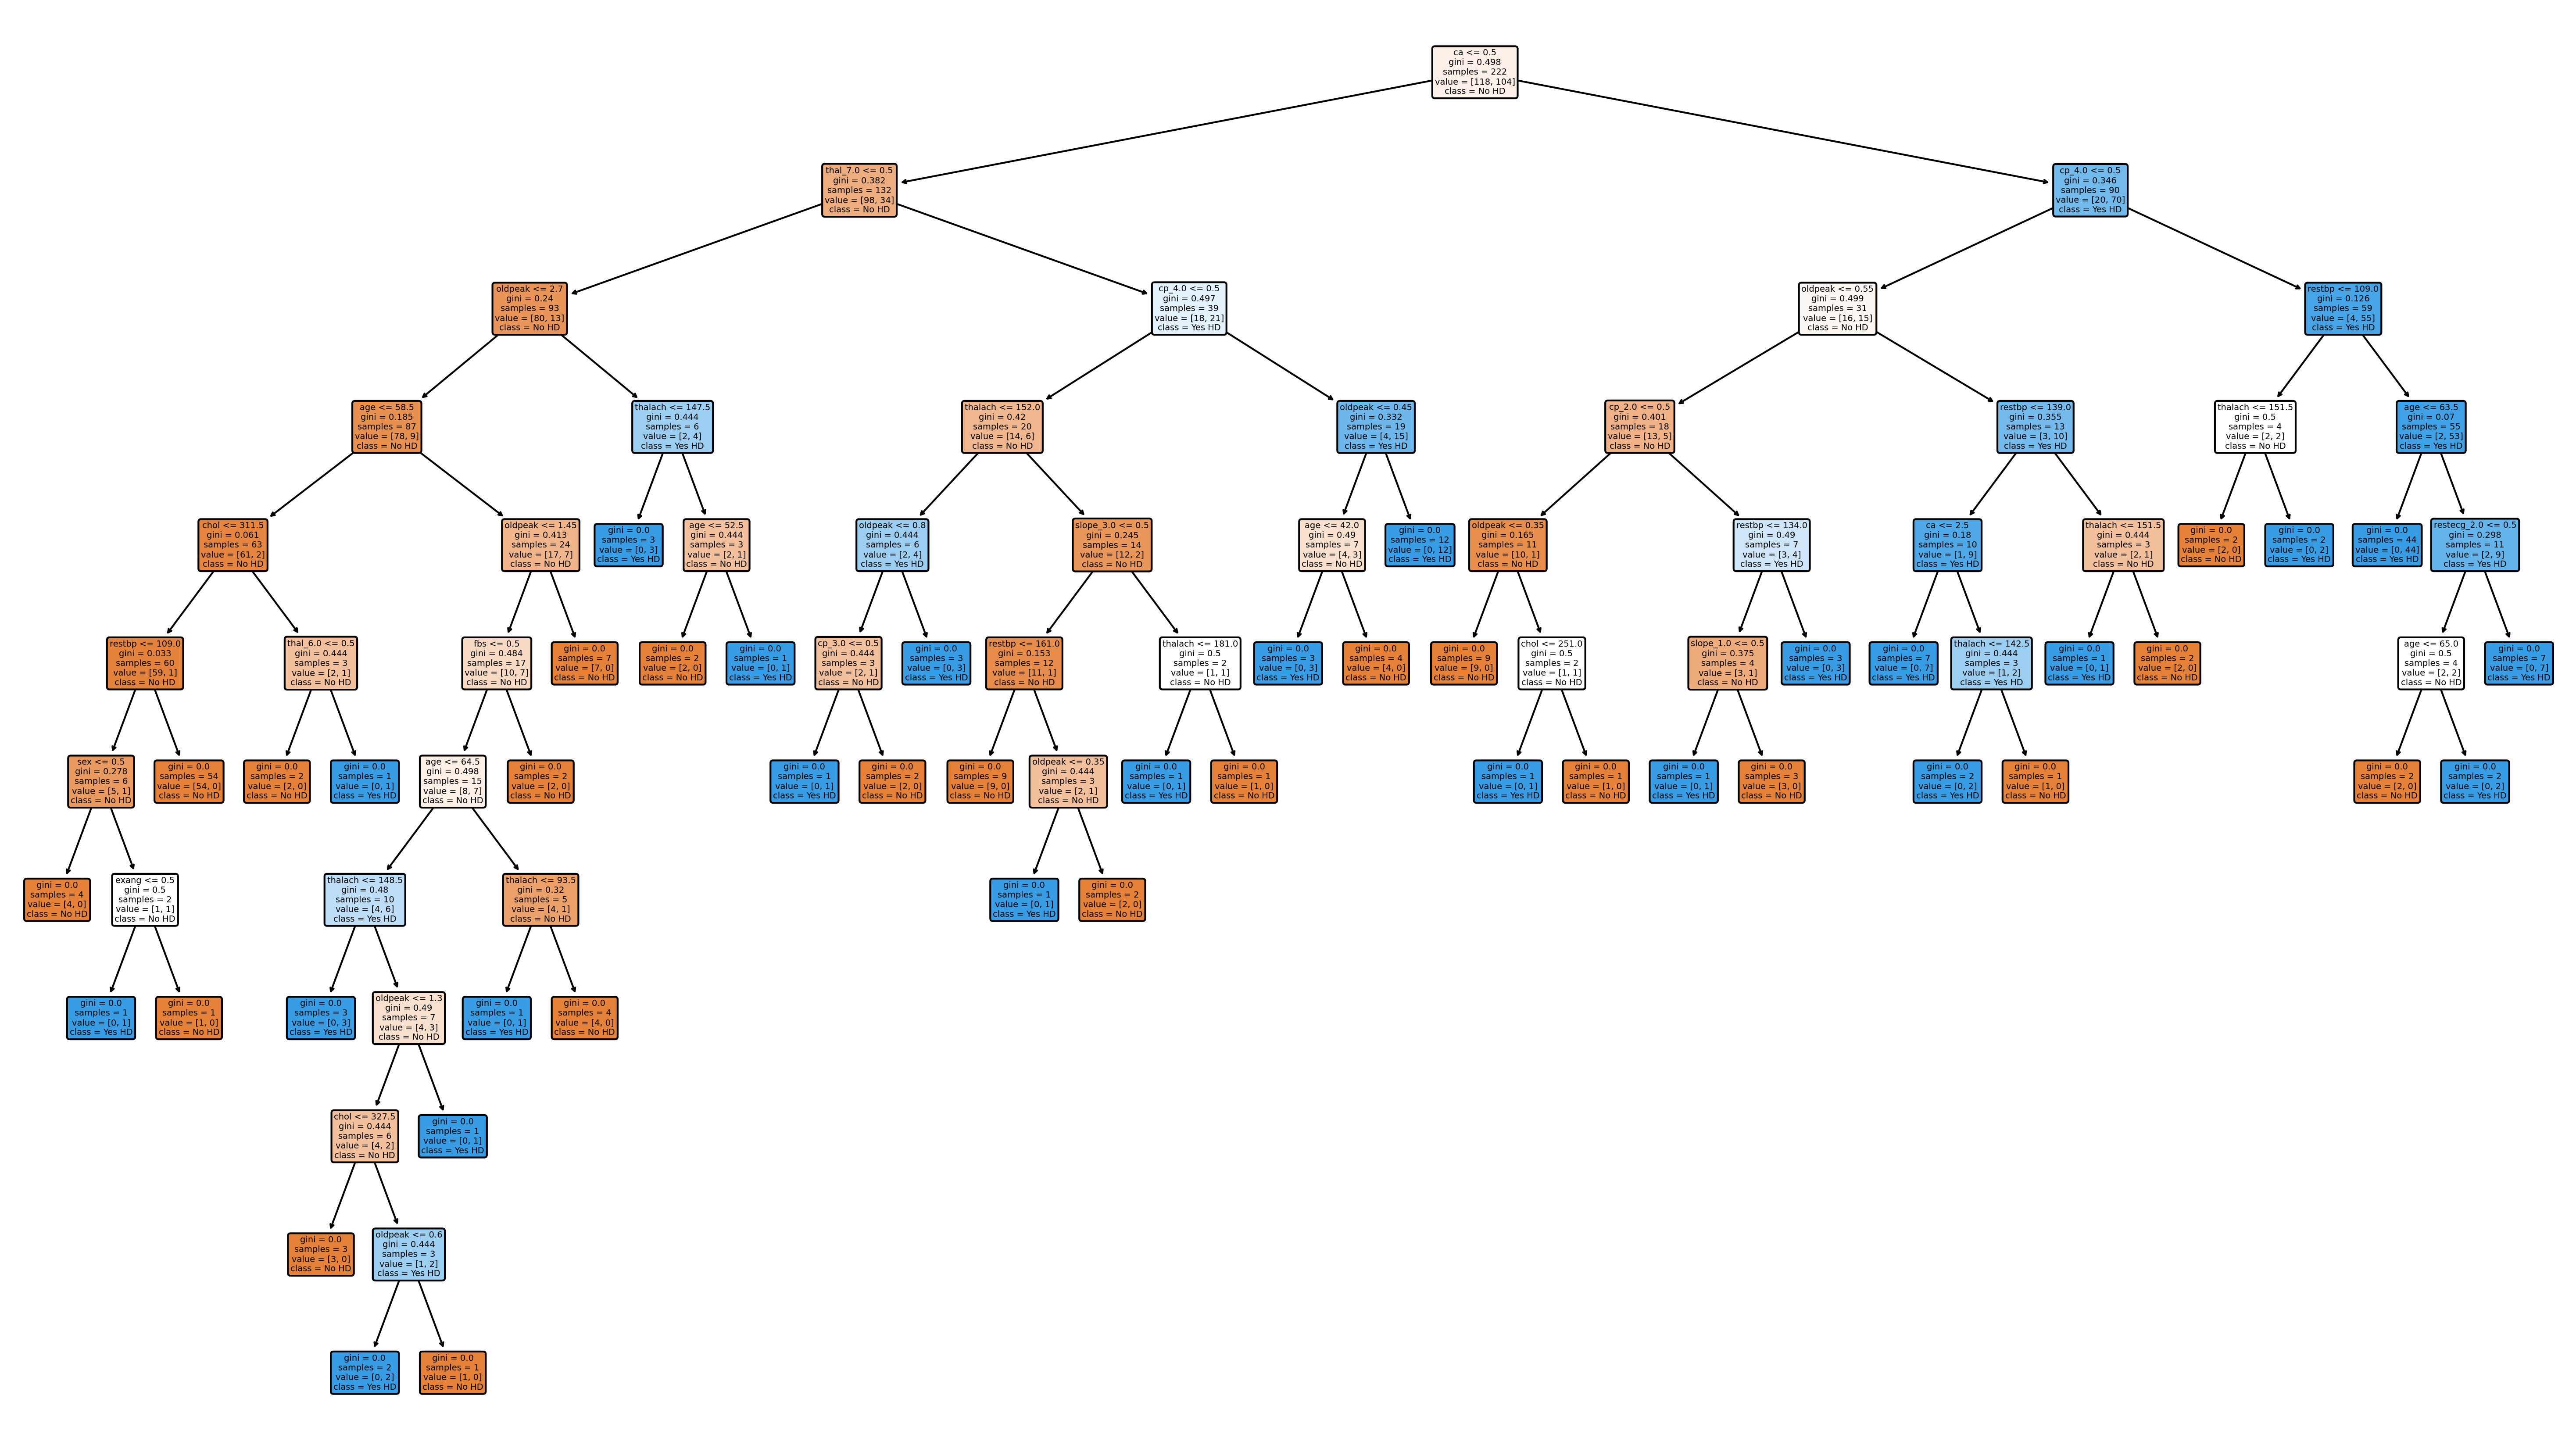

In [55]:
# PLOTTING THE TREE

from sklearn.tree import plot_tree

plt.figure(figsize=(25, 14), dpi=300)
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["No HD", "Yes HD"],
         feature_names=X_encoded.columns.tolist());

In [67]:
# COST COMPLEXITY PRUNING

In [69]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[ :- 1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

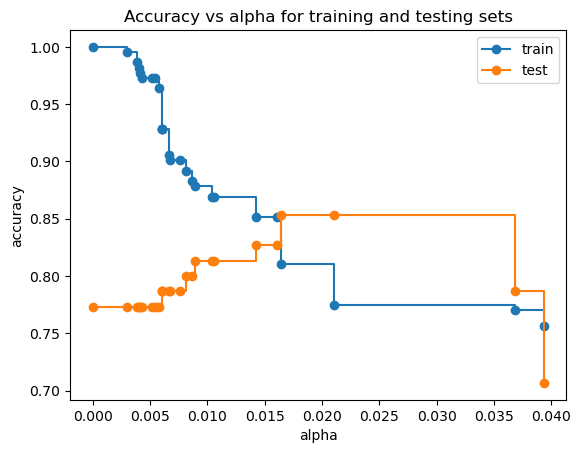

In [74]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax. legend()
plt.show()


<Axes: xlabel='tree'>

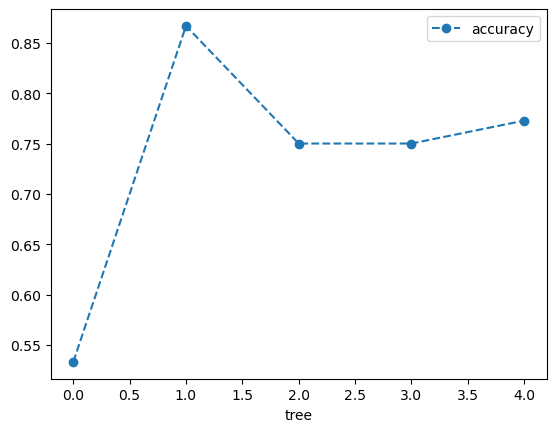

In [79]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score


clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree' : range(5), 'accuracy': scores})
df.plot(x="tree", y="accuracy", marker= 'o', linestyle = '--')

<Axes: xlabel='alpha'>

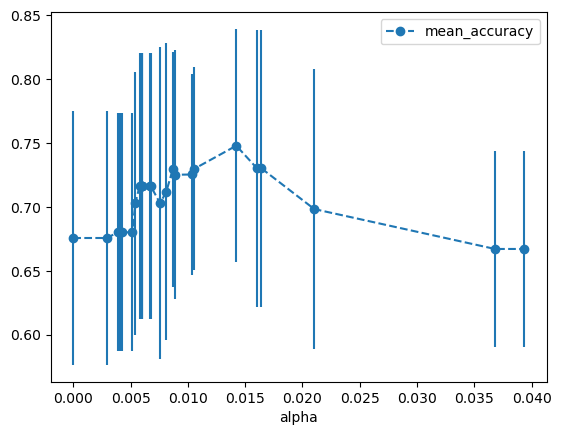

In [82]:
# create an array to store the results of each fold 

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                y='mean_accuracy',
                yerr='std',
                marker='o',
                linestyle='--')

In [83]:
alpha_results[(alpha_results['alpha'] > 0.014)
&
(alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [84]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
&
(alpha_results['alpha'] < 0.015) ]['alpha']



ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [86]:
ideal_ccp_alpha = float(ideal_ccp_alpha)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6284\724145576.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha = float(ideal_ccp_alpha)


In [88]:
# BUILDING THE CLASSIFICATION TREE

clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_ccp_alpha)

clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

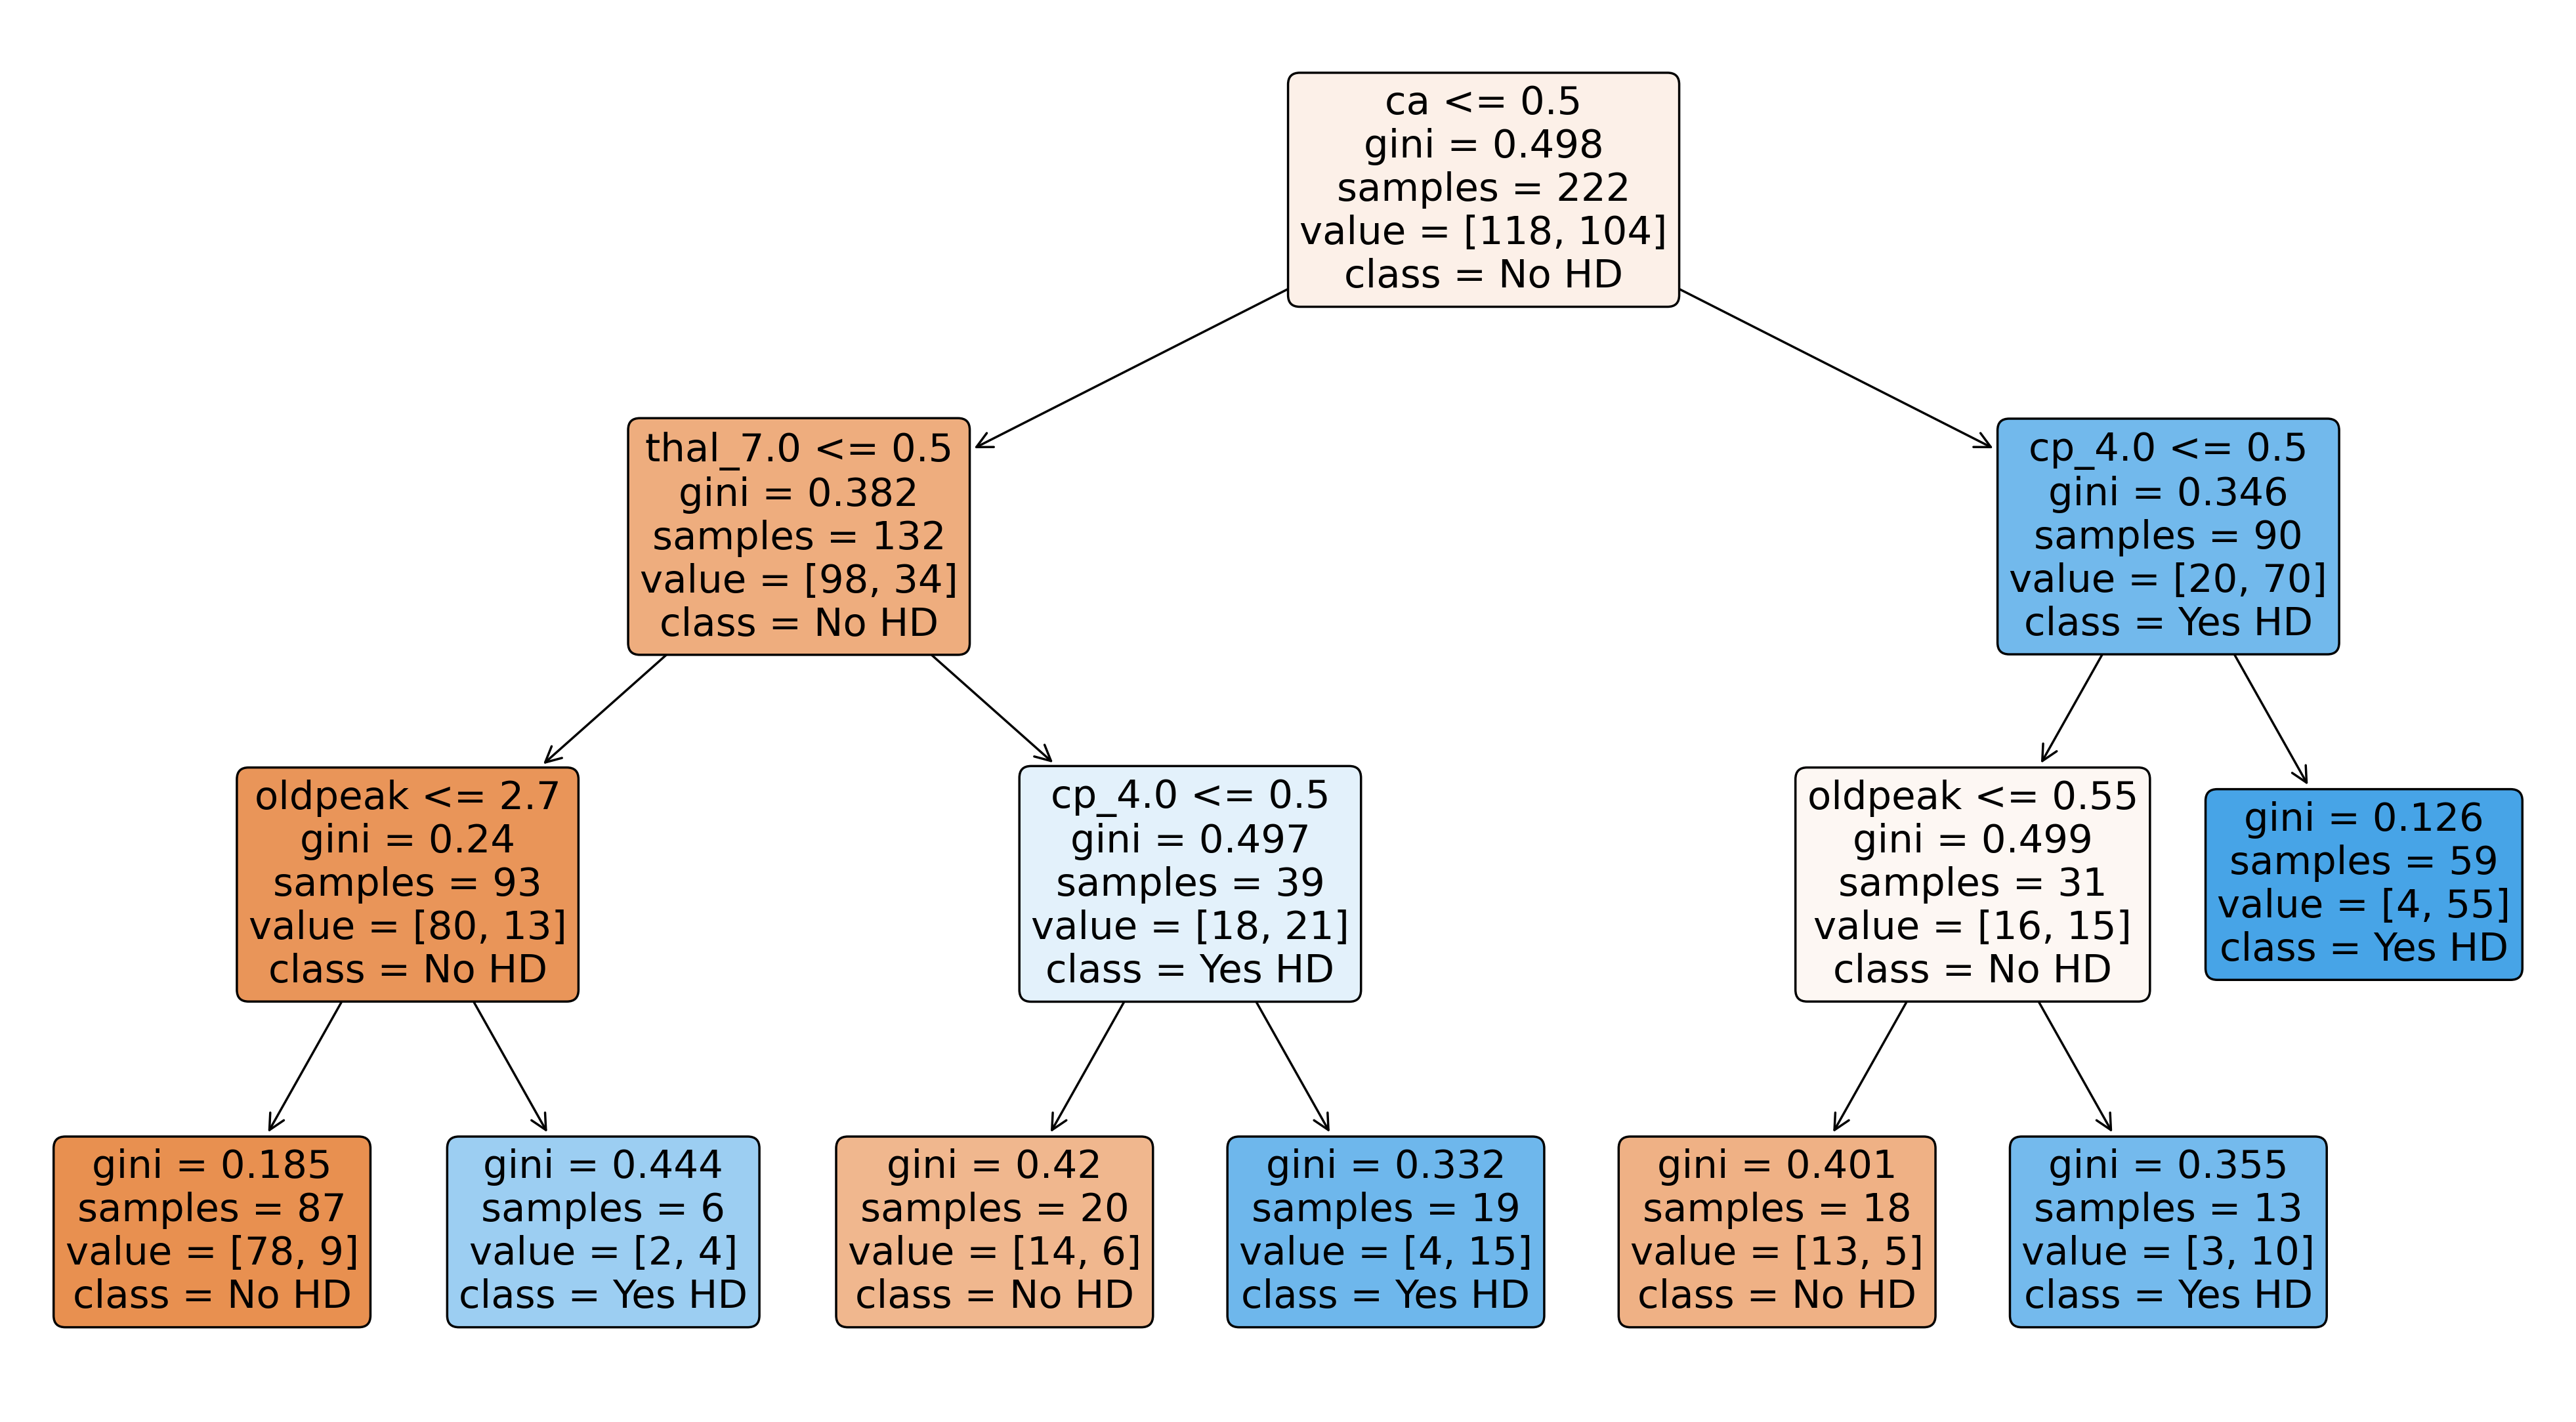

In [89]:
plt.figure(figsize=(20, 11), dpi = 250)
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=["No HD", "Yes HD"],
         feature_names=X_encoded.columns.tolist());